In [11]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

In [12]:
features = utils.load('fma_metadata/features.csv')

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 422.0 MB


In [14]:
features.columns.names
#Ci sono 3 livelli gerarchici di attributi (definiti con la struttura dati MultiIndex)
#Feature -> Statistics -> Number

FrozenList(['feature', 'statistics', 'number'])

In [15]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [16]:
features['chroma_cens'].head()

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3           1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5           0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10          3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20         -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

statistics                                          ...       std            \
number            07        08        09        10  ...        03        04   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.092350  0.077237   
3           1.366848  1.054094  0.108103  0.619185  ...  0.102759  0.090946   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.100257  0.072991   
10          1.770694  1.604566  0.521217  1.982386  ...  0.056647  0.118345   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.147100  0.112692   

statistics                                                              \
number            05        06        07        08        09        10   
track_id                                                                 
2           0.074284  0.077322  0.077279  0.068588  0.079606  0.085470   
3           0.075314  0.102431  0.083249  0.100854  0.089236  0.083384   
5           0.071584  0.076366  0.126677  0.131232  0.108912  0.101764   
10          0.080761  0.071630  0.083277  0.069644  0.104290  0.077502   
20          0.130581  0.126656  0.146840  0.165409  0.112400  0.157284   

statistics                      
number            11        12  
track_id                        
2           0.085498  0.098219  
3           0.079806  0.071072  
5           0.089526  0.088002  
10          0.074136  0.090781  
20          0.178552  0.137254  

[5 rows x 84 columns]

In [17]:
features['chroma_cens','kurtosis'].head()

number          01        02        03        04        05        06  \
track_id                                                               
2         7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3         1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5         0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10        3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20       -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

number          07        08        09        10        11        12  
track_id                                                              
2         1.481593  2.691455  0.866868  1.341231  1.347792  1.237658  
3         1.366848  1.054094  0.108103  0.619185  1.038253  1.292235  
5        -0.923192 -0.927232  0.666617  1.038546  0.268932  1.125141  
10        1.770694  1.604566  0.521217  1.982386  4.326824  1.300406  
20       -0.289294 -0.816410  0.043851 -0.804761 -0.990958 -0.430381

In [18]:
features.columns.get_level_values('feature').unique()

Index(['chroma_cens', 'chroma_cqt', 'chroma_stft', 'mfcc', 'rmse',
       'spectral_bandwidth', 'spectral_centroid', 'spectral_contrast',
       'spectral_rolloff', 'tonnetz', 'zcr'],
      dtype='object', name='feature')

In [19]:
features.columns.get_level_values('statistics').unique()

Index(['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std'], dtype='object', name='statistics')

In [20]:
features.columns.get_level_values('number').unique()

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='number')

In [21]:
#Ogni feature ha una cardinalità di attributi 'number' diversi 
#che dipendono dal risultato restituito dalle funzioni della libreria librosa

#Ad ogni number corrisponde un array sul quale sono calcolate tutte e 7 le statistiche

In [22]:
features['chroma_stft'].shape

(106574, 84)

In [23]:
features['mfcc'].shape

(106574, 140)

In [24]:
features['spectral_centroid'].shape

(106574, 7)

In [25]:
features['spectral_contrast'].shape

(106574, 49)

In [26]:
features['spectral_rolloff'].shape

(106574, 7)

In [27]:
features['tonnetz'].shape

(106574, 42)

In [28]:
features['zcr'].shape

(106574, 7)

In [29]:
#funzione per caricare il brano
x, sr = librosa.load('sample.wav', duration=10, sr=None)

In [30]:
x

array([-0.00276184, -0.00306702, -0.00239563, ..., -0.18760681,
       -0.20210266, -0.21633911], dtype=float32)

In [31]:
x.size

441000

In [32]:
sr

44100

In [33]:
ipd.Audio(x, rate=sr)

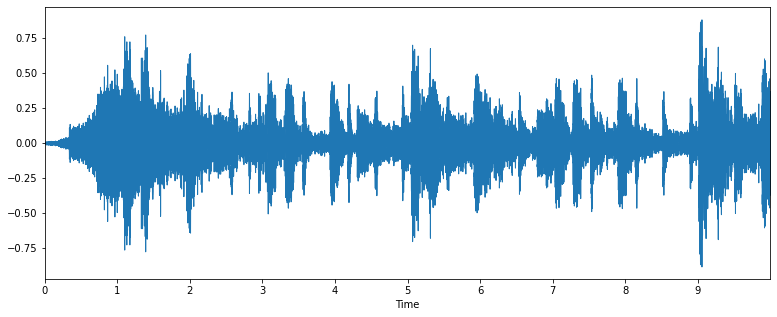

In [34]:
librosa.display.waveplot(x, sr=sr)

#This visualization is called the time-domain representation of a given signal. 
#This shows us the loudness (amplitude) of sound wave changing with time.

In [35]:
#Compute the constant-Q transform of an audio signal (from time-domain to frequency-domain).
#The frequency-domain representation of a signal tells us what different frequencies are present in the signal.

#there are twelve pitch (note musicali), each of them represented by a specific frequency in the range (20Hz-20KHz)

#The chroma features are based on the twelve pitch C ,  C♯ ,  D ,  … ,  B  
#each chroma vector indicates how the energy in a signal's frame 
#is distributed across the twelve chroma bands.

cqt = np.abs(librosa.cqt(x, sr=sr, hop_length=512, bins_per_octave=12,
                                 n_bins=7*12, tuning=None))
cqt.shape

(84, 862)

In [36]:
chroma_cqt = librosa.feature.chroma_cqt(C=cqt, n_chroma=12, n_octaves=7)
chroma_cqt.shape

(12, 862)

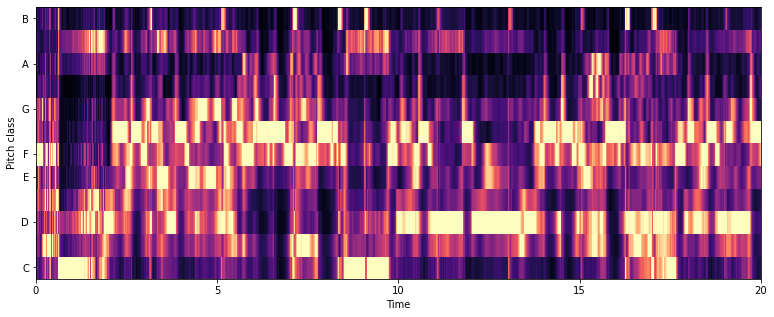

In [37]:
librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time')

In [38]:
#Computes the chroma variant “Chroma Energy Normalized” (CENS)
chroma_cens = librosa.feature.chroma_cens(C=cqt, n_chroma=12, n_octaves=7)
chroma_cens.shape

(12, 862)

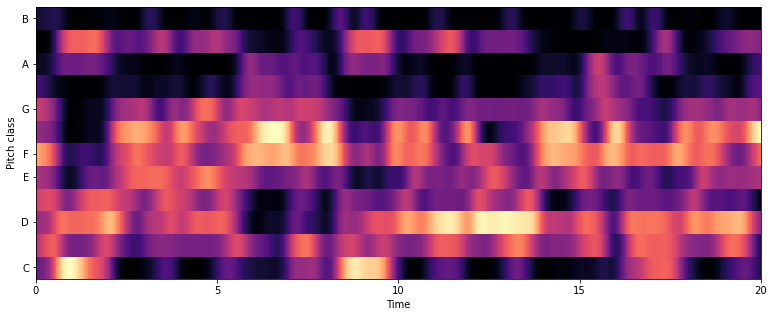

In [39]:
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')

In [40]:
#Tonnetz is a conceptual lattice diagram representing the arrangement of pitch
tonnetz = librosa.feature.tonnetz(chroma=chroma_cens)
tonnetz.shape

(6, 862)

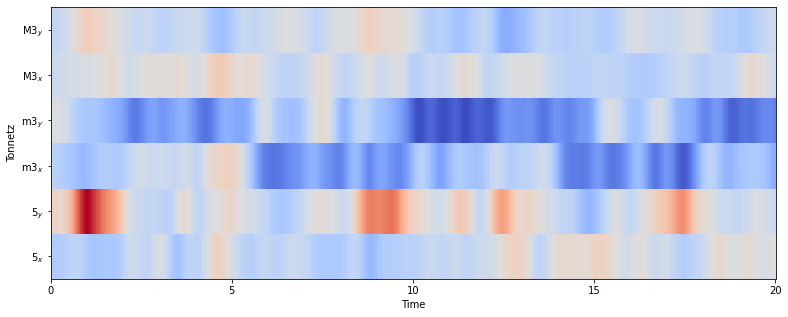

In [41]:
librosa.display.specshow(tonnetz,y_axis='tonnetz', x_axis='time')

In [42]:
#Short-time Fourier transform (another way to transform the time-domain in frequency domain)
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))

In [43]:
chroma_stft = librosa.feature.chroma_stft(S=stft**2, n_chroma=12)

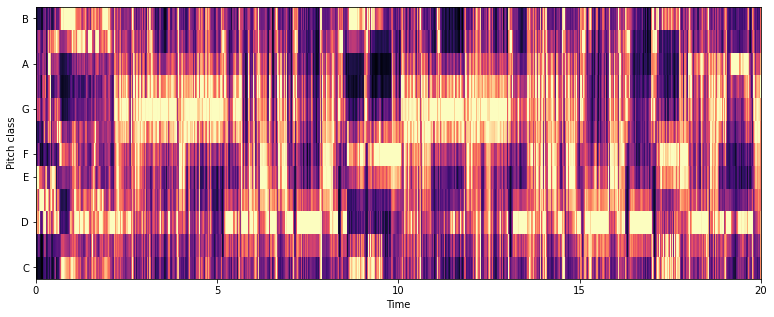

In [44]:
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')

In [45]:
#root-mean-square of value at each frame

rms = librosa.feature.rms(S=stft)
rms.shape

(1, 862)

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


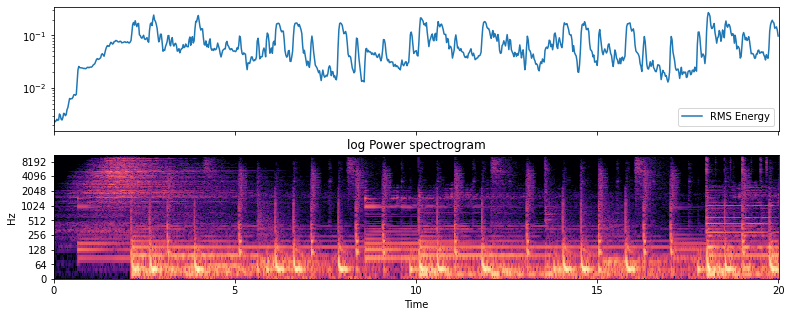

In [46]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

In [47]:
#difference between upper frequency and lower frequency

spec_bw = librosa.feature.spectral_bandwidth(x)
spec_bw.shape

(1, 862)

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


ValueError: operands could not be broadcast together with shapes (858,) (862,) 

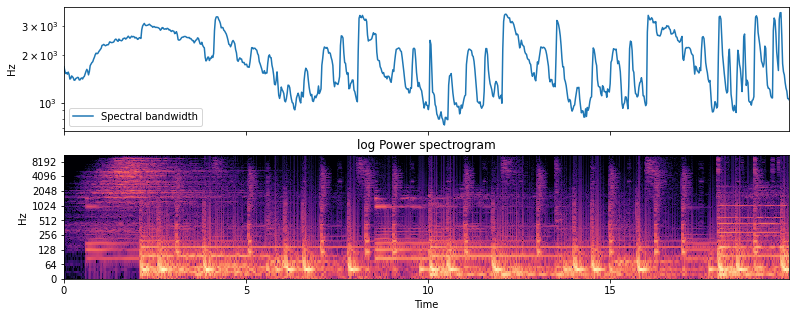

In [48]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, centroid[0] - spec_bw[0], centroid[0] + spec_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

[Text(0.5, 1.0, 'log Power spectrogram')]

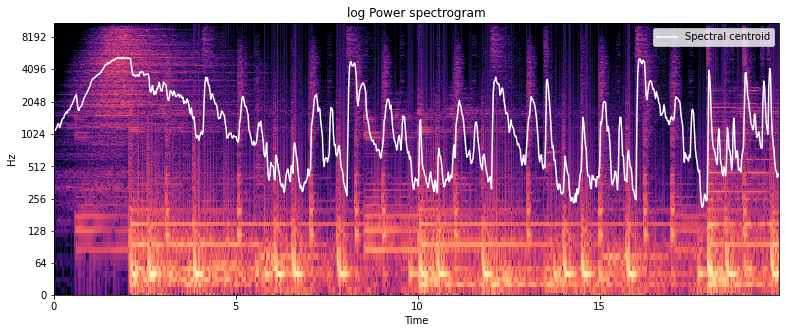

In [49]:
#It indicates where the ”centre of mass” for a sound is located and is 
#calculated as the weighted mean of the frequencies present in the sound.

cent = librosa.feature.spectral_centroid(x)
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\polpo\anaconda3\envs\fma\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

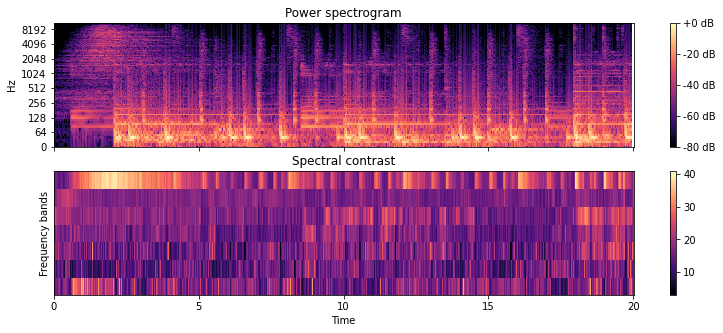

In [50]:
#Spectral contrast is defined as the level difference between peaks and valleys in the spectrum
#Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast 
#is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). 

contrast = librosa.feature.spectral_contrast(x, n_bands=6)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

In [51]:
contrast.shape

(7, 862)

In [52]:
#It is a measure of the shape of the signal. It represents the frequency below which a specified
#percentage of the total spectral energy, e.g. 85%, lies.

rolloff = librosa.feature.spectral_rolloff(x, roll_percent=0.85)
rolloff_min = librosa.feature.spectral_rolloff(x, roll_percent=0.15)

[Text(0.5, 1.0, 'log Power spectrogram')]

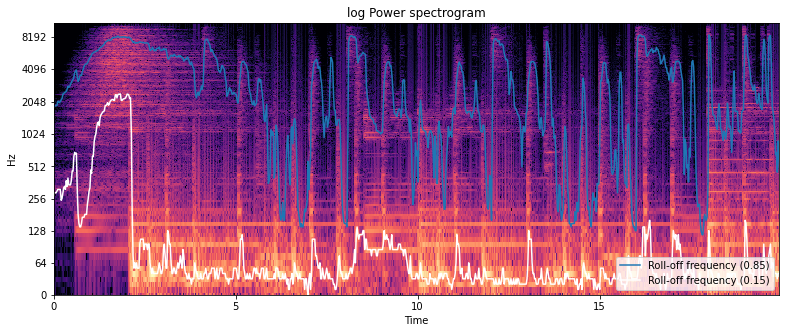

In [53]:
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.85)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.15)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [54]:
#the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound

mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)

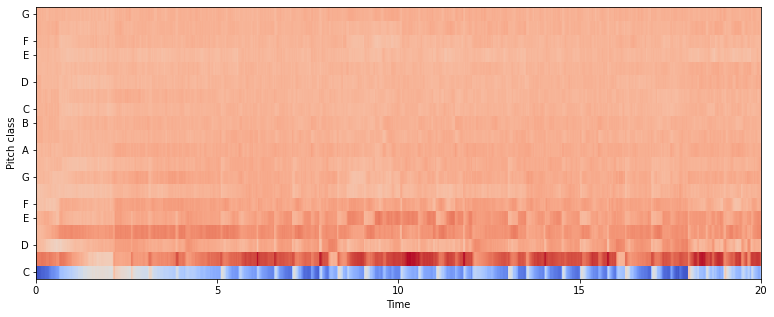

In [55]:
librosa.display.specshow(mfcc, y_axis='chroma', x_axis='time')

In [56]:
#Zero-crossing rate is a measure of number of times in a given time interval/frame 
#that the amplitude of the speech signals passes through a value of zero.

#It usually has higher values for highly percussive sounds like those in metal and rock.

f = librosa.feature.zero_crossing_rate(x, frame_length=2048, hop_length=512)
f

array([[0.02734375, 0.04150391, 0.06152344, 0.06787109, 0.07421875,
        0.07666016, 0.06982422, 0.07324219, 0.07128906, 0.08691406,
        0.09765625, 0.10205078, 0.109375  , 0.11083984, 0.1171875 ,
        0.12353516, 0.12744141, 0.12646484, 0.12695312, 0.13085938,
        0.1328125 , 0.13476562, 0.14404297, 0.15283203, 0.16259766,
        0.17041016, 0.17773438, 0.16992188, 0.14599609, 0.11816406,
        0.08691406, 0.06982422, 0.07128906, 0.08447266, 0.09667969,
        0.10888672, 0.11865234, 0.12597656, 0.13720703, 0.14208984,
        0.15185547, 0.15625   , 0.16503906, 0.18212891, 0.19677734,
        0.21679688, 0.22460938, 0.23583984, 0.2421875 , 0.24707031,
        0.25732422, 0.26904297, 0.28027344, 0.28271484, 0.28076172,
        0.28271484, 0.28857422, 0.30371094, 0.32421875, 0.33984375,
        0.35546875, 0.36230469, 0.37451172, 0.38330078, 0.37792969,
        0.39453125, 0.39746094, 0.39697266, 0.41992188, 0.42480469,
        0.43310547, 0.43896484, 0.43164062, 0.43

In [58]:
#Statistiche non note

#skew= In teoria delle probabilità una distribuzione di probabilità è simmetrica 
#quando la sua funzione di probabilità P siano simmetriche rispetto ad un punto

#kurtosis= In statistica, l'indice di curtosi è uno degli indici relativi alla forma di una distribuzione, 
#che costituisce una misura del grado di "appiattimento" di una distribuzione.

# Analisi

In [ ]:
#Prendo in considerazione il subset medium (siccome contiene record con un unico genre_top) 
#per effettuare un analisi in termini di feature dei vari generi
#Costruisco un dataframe contenente la media delle feature per ogni genere

In [60]:
tracks = utils.load('fma_metadata/tracks.csv')

In [69]:
tracks['set','subset'].unique()

['small', 'medium', 'large']
Categories (3, object): ['small' < 'medium' < 'large']

In [70]:
tracks['set','subset']<='medium'

track_id
2          True
3          True
5          True
10         True
20        False
          ...  
155316    False
155317    False
155318    False
155319    False
155320    False
Name: (set, subset), Length: 106574, dtype: bool

In [71]:
features_medium= features[tracks['set','subset']<='medium']

In [72]:
features_medium.shape

(25000, 518)

In [73]:
tracks[tracks['set','subset']<='medium']['track']['genre_top']

track_id
2              Hip-Hop
3              Hip-Hop
5              Hip-Hop
10                 Pop
134            Hip-Hop
              ...     
155297    Instrumental
155298            Folk
155306            Folk
155307    Experimental
155314            Rock
Name: genre_top, Length: 25000, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [74]:
genre_medium= tracks[tracks['set','subset']<='medium']['track']['genre_top']
genre_medium

track_id
2              Hip-Hop
3              Hip-Hop
5              Hip-Hop
10                 Pop
134            Hip-Hop
              ...     
155297    Instrumental
155298            Folk
155306            Folk
155307    Experimental
155314            Rock
Name: genre_top, Length: 25000, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [75]:
genre_top= genre_medium.unique()
genre_top

['Hip-Hop', 'Pop', 'Rock', 'Folk', 'Experimental', ..., 'Country', 'Classical', 'Old-Time / Historic', 'Instrumental', 'Easy Listening']
Length: 16
Categories (16, object): ['Hip-Hop', 'Pop', 'Rock', 'Folk', ..., 'Classical', 'Old-Time / Historic', 'Instrumental', 'Easy Listening']

In [76]:
genre_feat= pd.DataFrame(columns=features.columns)
genre_feat

Empty DataFrame
Columns: [(chroma_cens, kurtosis, 01), (chroma_cens, kurtosis, 02), (chroma_cens, kurtosis, 03), (chroma_cens, kurtosis, 04), (chroma_cens, kurtosis, 05), (chroma_cens, kurtosis, 06), (chroma_cens, kurtosis, 07), (chroma_cens, kurtosis, 08), (chroma_cens, kurtosis, 09), (chroma_cens, kurtosis, 10), (chroma_cens, kurtosis, 11), (chroma_cens, kurtosis, 12), (chroma_cens, max, 01), (chroma_cens, max, 02), (chroma_cens, max, 03), (chroma_cens, max, 04), (chroma_cens, max, 05), (chroma_cens, max, 06), (chroma_cens, max, 07), (chroma_cens, max, 08), (chroma_cens, max, 09), (chroma_cens, max, 10), (chroma_cens, max, 11), (chroma_cens, max, 12), (chroma_cens, mean, 01), (chroma_cens, mean, 02), (chroma_cens, mean, 03), (chroma_cens, mean, 04), (chroma_cens, mean, 05), (chroma_cens, mean, 06), (chroma_cens, mean, 07), (chroma_cens, mean, 08), (chroma_cens, mean, 09), (chroma_cens, mean, 10), (chroma_cens, mean, 11), (chroma_cens, mean, 12), (chroma_cens, median, 01), (chroma_cens, median, 02), (chroma_cens, median, 03), (chroma_cens, median, 04), (chroma_cens, median, 05), (chroma_cens, median, 06), (chroma_cens, median, 07), (chroma_cens, median, 08), (chroma_cens, median, 09), (chroma_cens, median, 10), (chroma_cens, median, 11), (chroma_cens, median, 12), (chroma_cens, min, 01), (chroma_cens, min, 02), (chroma_cens, min, 03), (chroma_cens, min, 04), (chroma_cens, min, 05), (chroma_cens, min, 06), (chroma_cens, min, 07), (chroma_cens, min, 08), (chroma_cens, min, 09), (chroma_cens, min, 10), (chroma_cens, min, 11), (chroma_cens, min, 12), (chroma_cens, skew, 01), (chroma_cens, skew, 02), (chroma_cens, skew, 03), (chroma_cens, skew, 04), (chroma_cens, skew, 05), (chroma_cens, skew, 06), (chroma_cens, skew, 07), (chroma_cens, skew, 08), (chroma_cens, skew, 09), (chroma_cens, skew, 10), (chroma_cens, skew, 11), (chroma_cens, skew, 12), (chroma_cens, std, 01), (chroma_cens, std, 02), (chroma_cens, std, 03), (chroma_cens, std, 04), (chroma_cens, std, 05), (chroma_cens, std, 06), (chroma_cens, std, 07), (chroma_cens, std, 08), (chroma_cens, std, 09), (chroma_cens, std, 10), (chroma_cens, std, 11), (chroma_cens, std, 12), (chroma_cqt, kurtosis, 01), (chroma_cqt, kurtosis, 02), (chroma_cqt, kurtosis, 03), (chroma_cqt, kurtosis, 04), (chroma_cqt, kurtosis, 05), (chroma_cqt, kurtosis, 06), (chroma_cqt, kurtosis, 07), (chroma_cqt, kurtosis, 08), (chroma_cqt, kurtosis, 09), (chroma_cqt, kurtosis, 10), (chroma_cqt, kurtosis, 11), (chroma_cqt, kurtosis, 12), (chroma_cqt, max, 01), (chroma_cqt, max, 02), (chroma_cqt, max, 03), (chroma_cqt, max, 04), ...]
Index: []

[0 rows x 518 columns]

In [77]:
i=0
for genre in genre_top:
    genre_feat.loc[i]=features_medium[genre_medium==genre].mean().values
    i=i+1
genre_feat

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0             0.091640  0.031757  0.103762  0.044160  0.013121  0.027338   
1            -0.043961 -0.120137  0.073716 -0.072632 -0.073642 -0.058732   
2             0.302616  0.194241  0.276782  0.192128  0.136770  0.248414   
3             0.133648 -0.117376  0.060679 -0.124668  0.135757  0.003804   
4             0.402340  0.464963  0.702613  0.551411  0.482232  0.488654   
5            -0.061726 -0.157876 -0.027899 -0.154354 -0.075244 -0.031228   
6             0.140148  0.046782  0.305312  0.079655  0.109177  0.168200   
7            -0.001675 -0.150818 -0.067130 -0.076551 -0.046157 -0.065732   
8             0.078632 -0.029539  0.170194  0.048578 -0.136358  0.027132   
9             0.175807  0.015692  0.199885 -0.116845  0.108659 -0.087766   
10            0.161890  0.132103  0.273818  0.311184  0.268104  0.301046   
11           -0.007966 -0.228756  0.102906 -0.092496 -0.035075  0.031562   
12           -0.490072 -0.601888 -0.575599 -0.579444 -0.484779 -0.506867   
13           -0.234780 -0.181872 -0.209152 -0.190852 -0.210012 -0.250289   
14            0.059694 -0.176750  0.191038  0.011495  0.020306  0.139787   
15           -0.293479 -0.279681 -0.181914 -0.259518 -0.191752  0.009313   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
0           0.004172  0.004350 -0.010172  0.012969  ...  0.084926  0.018935   
1          -0.123831 -0.018902 -0.105943 -0.047229  ...  0.106713  0.022004   
2           0.258040  0.312531  0.198272  0.177079  ...  0.093475  0.019163   
3          -0.068533 -0.012896 -0.141100 -0.106225  ...  0.126839  0.025029   
4           0.500940  0.639224  0.489876  0.659742  ...  0.088617  0.021105   
5          -0.162292 -0.191443 -0.220657 -0.127265  ...  0.113248  0.024112   
6           0.082979  0.223935  0.085744  0.121183  ...  0.092680  0.020740   
7          -0.137437 -0.037780 -0.162886 -0.058010  ...  0.098266  0.020111   
8           0.017337  0.179968  0.073766  0.199726  ...  0.096622  0.019264   
9           0.222688  0.324092 -0.011618  0.092223  ...  0.100228  0.021210   
10          0.159364  0.232470  0.161424  0.142104  ...  0.079165  0.016529   
11          0.014681  0.031407 -0.209747 -0.047944  ...  0.102276  0.020342   
12         -0.547507 -0.493637 -0.553731 -0.615589  ...  0.144806  0.029908   
13         -0.263765 -0.187758 -0.162255 -0.252575  ...  0.115121  0.024886   
14         -0.108440  0.044319 -0.148532  0.095957  ...  0.123136  0.025736   
15          1.103853 -0.010950 -0.037183 -0.045727  ...  0.114827  0.023672   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
0           0.019417  15.176803  0.460874  0.058111  0.042694  0.001256   
1           0.022155  30.624259  0.416102  0.050967  0.042301  0.001880   
2           0.019470  21.371740  0.345920  0.057208  0.052492  0.003505   
3           0.025147  42.110677  0.361271  0.036356  0.029257  0.002524   
4           0.021569  40.525370  0.383739  0.058845  0.049847  0.002777   
5           0.024166  35.995704  0.378611  0.044097  0.036174  0.001664   
6           0.021077  22.148990  0.428921  0.053919  0.040244  0.001243   
7           0.020380  22.465466  0.398425  0.057270  0.048900  0.004443   
8           0.019684  23.087517  0.528273  0.066103  0.051206  0.001912   
9           0.021969  20.156730  0.410770  0.047991  0.038686  0.002217   
10          0.017380  12.725908  0.442242  0.064207  0.046124  0.002263   
11 

In [78]:
genre_feat['genre']=genre_top
genre_feat

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0             0.091640  0.031757  0.103762  0.044160  0.013121  0.027338   
1            -0.043961 -0.120137  0.073716 -0.072632 -0.073642 -0.058732   
2             0.302616  0.194241  0.276782  0.192128  0.136770  0.248414   
3             0.133648 -0.117376  0.060679 -0.124668  0.135757  0.003804   
4             0.402340  0.464963  0.702613  0.551411  0.482232  0.488654   
5            -0.061726 -0.157876 -0.027899 -0.154354 -0.075244 -0.031228   
6             0.140148  0.046782  0.305312  0.079655  0.109177  0.168200   
7            -0.001675 -0.150818 -0.067130 -0.076551 -0.046157 -0.065732   
8             0.078632 -0.029539  0.170194  0.048578 -0.136358  0.027132   
9             0.175807  0.015692  0.199885 -0.116845  0.108659 -0.087766   
10            0.161890  0.132103  0.273818  0.311184  0.268104  0.301046   
11           -0.007966 -0.228756  0.102906 -0.092496 -0.035075  0.031562   
12           -0.490072 -0.601888 -0.575599 -0.579444 -0.484779 -0.506867   
13           -0.234780 -0.181872 -0.209152 -0.190852 -0.210012 -0.250289   
14            0.059694 -0.176750  0.191038  0.011495  0.020306  0.139787   
15           -0.293479 -0.279681 -0.181914 -0.259518 -0.191752  0.009313   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        05        06   
0           0.004172  0.004350 -0.010172  0.012969  ...  0.018935  0.019417   
1          -0.123831 -0.018902 -0.105943 -0.047229  ...  0.022004  0.022155   
2           0.258040  0.312531  0.198272  0.177079  ...  0.019163  0.019470   
3          -0.068533 -0.012896 -0.141100 -0.106225  ...  0.025029  0.025147   
4           0.500940  0.639224  0.489876  0.659742  ...  0.021105  0.021569   
5          -0.162292 -0.191443 -0.220657 -0.127265  ...  0.024112  0.024166   
6           0.082979  0.223935  0.085744  0.121183  ...  0.020740  0.021077   
7          -0.137437 -0.037780 -0.162886 -0.058010  ...  0.020111  0.020380   
8           0.017337  0.179968  0.073766  0.199726  ...  0.019264  0.019684   
9           0.222688  0.324092 -0.011618  0.092223  ...  0.021210  0.021969   
10          0.159364  0.232470  0.161424  0.142104  ...  0.016529  0.017380   
11          0.014681  0.031407 -0.209747 -0.047944  ...  0.020342  0.020504   
12         -0.547507 -0.493637 -0.553731 -0.615589  ...  0.029908  0.029865   
13         -0.263765 -0.187758 -0.162255 -0.252575  ...  0.024886  0.024958   
14         -0.108440  0.044319 -0.148532  0.095957  ...  0.025736  0.025813   
15          1.103853 -0.010950 -0.037183 -0.045727  ...  0.023672  0.024789   

feature           zcr                                                    \
statistics   kurtosis       max      mean    median       min      skew   
number             01        01        01        01        01        01   
0           15.176803  0.460874  0.058111  0.042694  0.001256  2.828050   
1           30.624259  0.416102  0.050967  0.042301  0.001880  3.644405   
2           21.371740  0.345920  0.057208  0.052492  0.003505  2.577958   
3           42.110677  0.361271  0.036356  0.029257  0.002524  4.513150   
4           40.525370  0.383739  0.058845  0.049847  0.002777  3.504712   
5           35.995704  0.378611  0.044097  0.036174  0.001664  3.773831   
6           22.148990  0.428921  0.053919  0.040244  0.001243  3.032589   
7           22.465466  0.398425  0.057270  0.048900  0.004443  2.953720   
8           23.087517  0.528273  0.066103  0.051206  0.001912  3.348717   
9           20.156730  0.410770  0.047991  0.038686  0.002217  3.012493   
10          12.725908  0.442242  0.064207  0.046124  0.002263  2.765486   
11 

In [79]:
genre_feat[['chroma_cens','genre']]

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
0             0.091640  0.031757  0.103762  0.044160  0.013121  0.027338   
1            -0.043961 -0.120137  0.073716 -0.072632 -0.073642 -0.058732   
2             0.302616  0.194241  0.276782  0.192128  0.136770  0.248414   
3             0.133648 -0.117376  0.060679 -0.124668  0.135757  0.003804   
4             0.402340  0.464963  0.702613  0.551411  0.482232  0.488654   
5            -0.061726 -0.157876 -0.027899 -0.154354 -0.075244 -0.031228   
6             0.140148  0.046782  0.305312  0.079655  0.109177  0.168200   
7            -0.001675 -0.150818 -0.067130 -0.076551 -0.046157 -0.065732   
8             0.078632 -0.029539  0.170194  0.048578 -0.136358  0.027132   
9             0.175807  0.015692  0.199885 -0.116845  0.108659 -0.087766   
10            0.161890  0.132103  0.273818  0.311184  0.268104  0.301046   
11           -0.007966 -0.228756  0.102906 -0.092496 -0.035075  0.031562   
12           -0.490072 -0.601888 -0.575599 -0.579444 -0.484779 -0.506867   
13           -0.234780 -0.181872 -0.209152 -0.190852 -0.210012 -0.250289   
14            0.059694 -0.176750  0.191038  0.011495  0.020306  0.139787   
15           -0.293479 -0.279681 -0.181914 -0.259518 -0.191752  0.009313   

feature                                             ...                      \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
0           0.004172  0.004350 -0.010172  0.012969  ...  0.116794  0.118628   
1          -0.123831 -0.018902 -0.105943 -0.047229  ...  0.121602  0.131641   
2           0.258040  0.312531  0.198272  0.177079  ...  0.107158  0.120801   
3          -0.068533 -0.012896 -0.141100 -0.106225  ...  0.132646  0.145191   
4           0.500940  0.639224  0.489876  0.659742  ...  0.109995  0.113720   
5          -0.162292 -0.191443 -0.220657 -0.127265  ...  0.137652  0.141171   
6           0.082979  0.223935  0.085744  0.121183  ...  0.118273  0.121391   
7          -0.137437 -0.037780 -0.162886 -0.058010  ...  0.120397  0.127948   
8           0.017337  0.179968  0.073766  0.199726  ...  0.122619  0.129426   
9           0.222688  0.324092 -0.011618  0.092223  ...  0.123441  0.135701   
10          0.159364  0.232470  0.161424  0.142104  ...  0.115981  0.119277   
11          0.014681  0.031407 -0.209747 -0.047944  ...  0.112535  0.133368   
12         -0.547507 -0.493637 -0.553731 -0.615589  ...  0.151241  0.153502   
13         -0.263765 -0.187758 -0.162255 -0.252575  ...  0.123328  0.124493   
14         -0.108440  0.044319 -0.148532  0.095957  ...  0.132929  0.140453   
15          1.103853 -0.010950 -0.037183 -0.045727  ...  0.131967  0.137955   

feature                                                                 \
statistics                                                               
number            06        07        08        09        10        11   
0           0.118642  0.116616  0.121588  0.120031  0.121026  0.118089   
1           0.128721  0.126420  0.132974  0.123466  0.134878  0.125475   
2           0.109728  0.111606  0.118015  0.109533  0.122044  0.109455   
3           0.135282  0.138489  0.144505  0.134156  0.150621  0.135621   
4           0.111609  0.109400  0.115162  0.110646  0.113646  0.110941   
5           0.139514  0.137238  0.149067  0.137199  0.144541  0.140162   
6           0.121390  0.118035  0.124646  0.120421  0.124794  0.118253   
7           0.125702  0.125751  0.132773  0.121336  0.132888  0.124019   
8           0.127741  0.120272  0.129903  0.123309  0.125444  0.125014   
9           0.128358  0.126455  0.131686  0.124973  0.139000  0.125225   
10          0.118169  0.121407  0.125563  0.122108  0.122917  0.120359   
11          0.116

In [ ]:
#Rappresento con parallel cordinates come cambiano i valori degli attributi al variare del genere
#Sembrerebbe che le statistiche più caratterizzanti siano kurtosis e skrew

<AxesSubplot:>

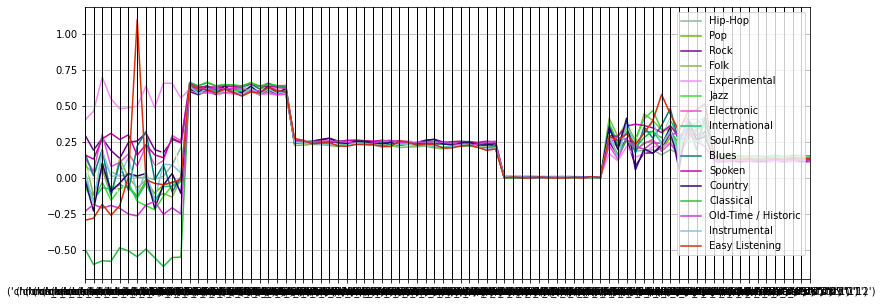

In [196]:
pd.plotting.parallel_coordinates(
    genre_feat[['chroma_cens','genre']], 'genre'
)

<AxesSubplot:>

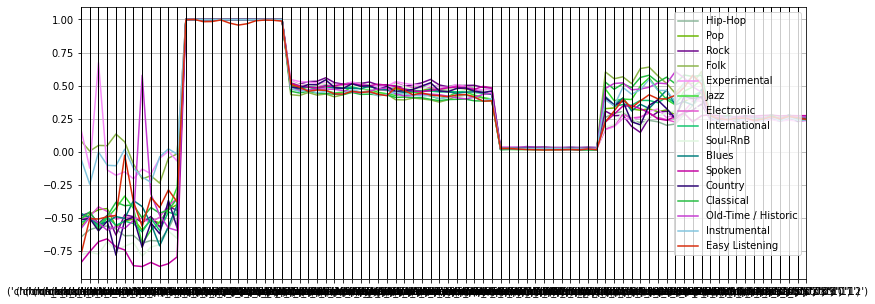

In [198]:
pd.plotting.parallel_coordinates(
    genre_feat[['chroma_cqt','genre']], 'genre'
)

<AxesSubplot:>

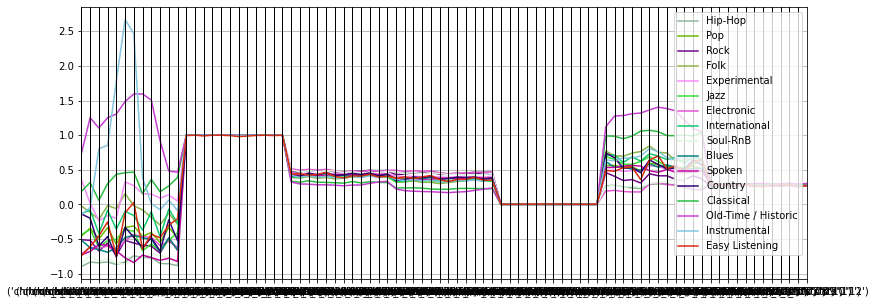

In [203]:
pd.plotting.parallel_coordinates(
    genre_feat[['chroma_stft','genre']], 'genre'
)

<AxesSubplot:>

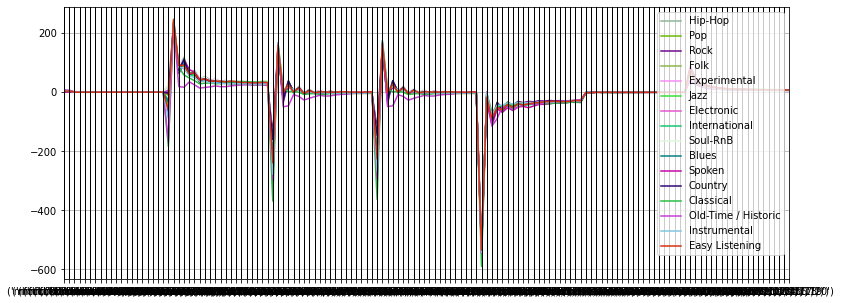

In [204]:
pd.plotting.parallel_coordinates(
    genre_feat[['mfcc','genre']], 'genre'
)

<AxesSubplot:>

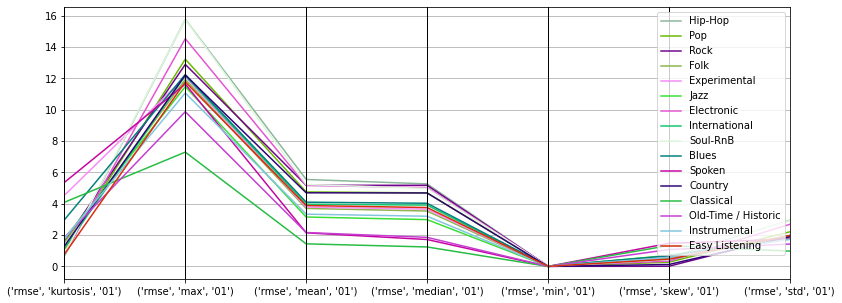

In [205]:
pd.plotting.parallel_coordinates(
    genre_feat[['rmse','genre']], 'genre'
)

<AxesSubplot:>

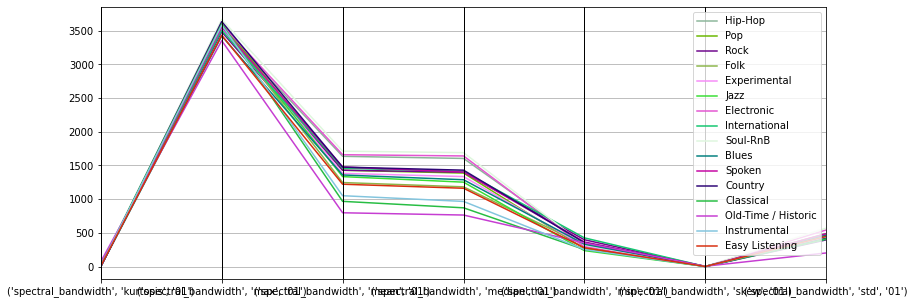

In [206]:
pd.plotting.parallel_coordinates(
    genre_feat[['spectral_bandwidth','genre']], 'genre'
)

<AxesSubplot:>

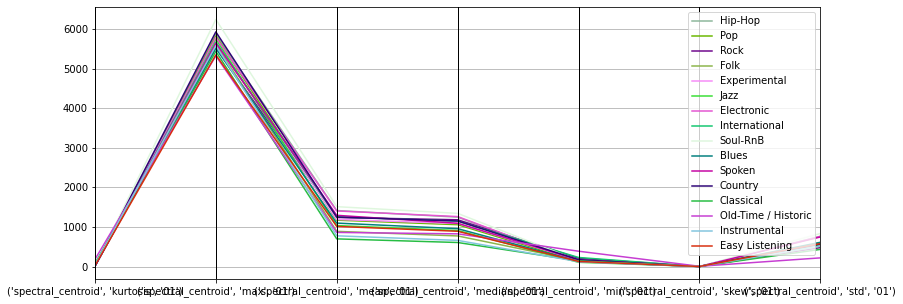

In [208]:
pd.plotting.parallel_coordinates(
    genre_feat[['spectral_centroid','genre']], 'genre'
)

<AxesSubplot:>

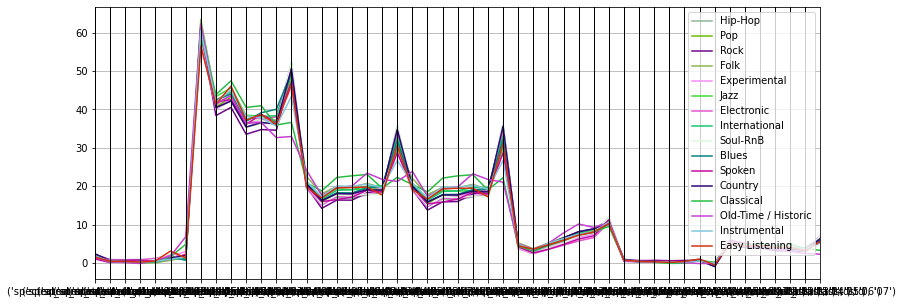

In [209]:
pd.plotting.parallel_coordinates(
    genre_feat[['spectral_contrast','genre']], 'genre'
)

<AxesSubplot:>

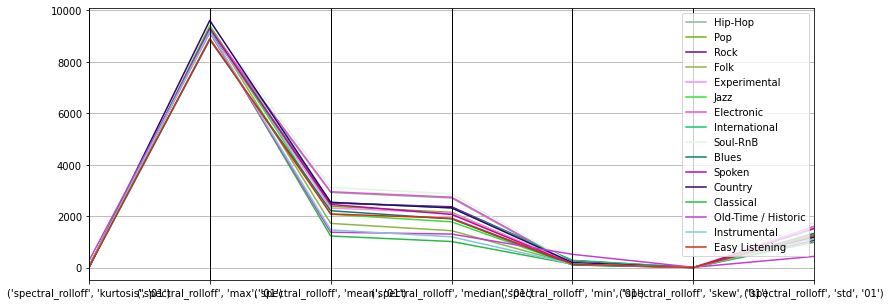

In [210]:
pd.plotting.parallel_coordinates(
    genre_feat[['spectral_rolloff','genre']], 'genre'
)

<AxesSubplot:>

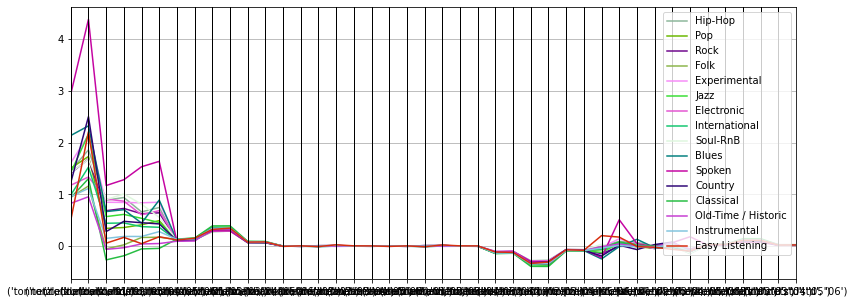

In [211]:
pd.plotting.parallel_coordinates(
    genre_feat[['tonnetz','genre']], 'genre'
)

<AxesSubplot:>

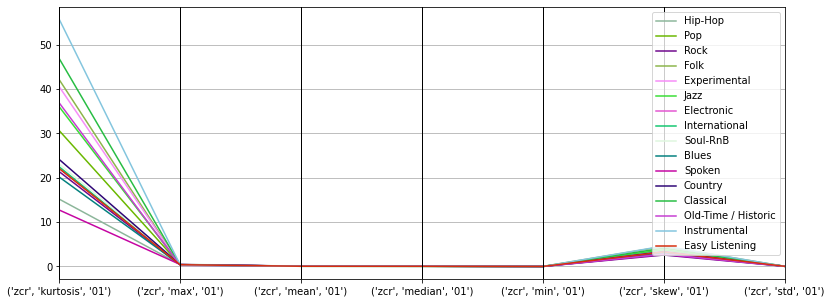

In [212]:
pd.plotting.parallel_coordinates(
    genre_feat[['zcr','genre']], 'genre'
)